<a href="https://colab.research.google.com/github/PRAJNA803/PRAJNA803/blob/main/cv_programs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

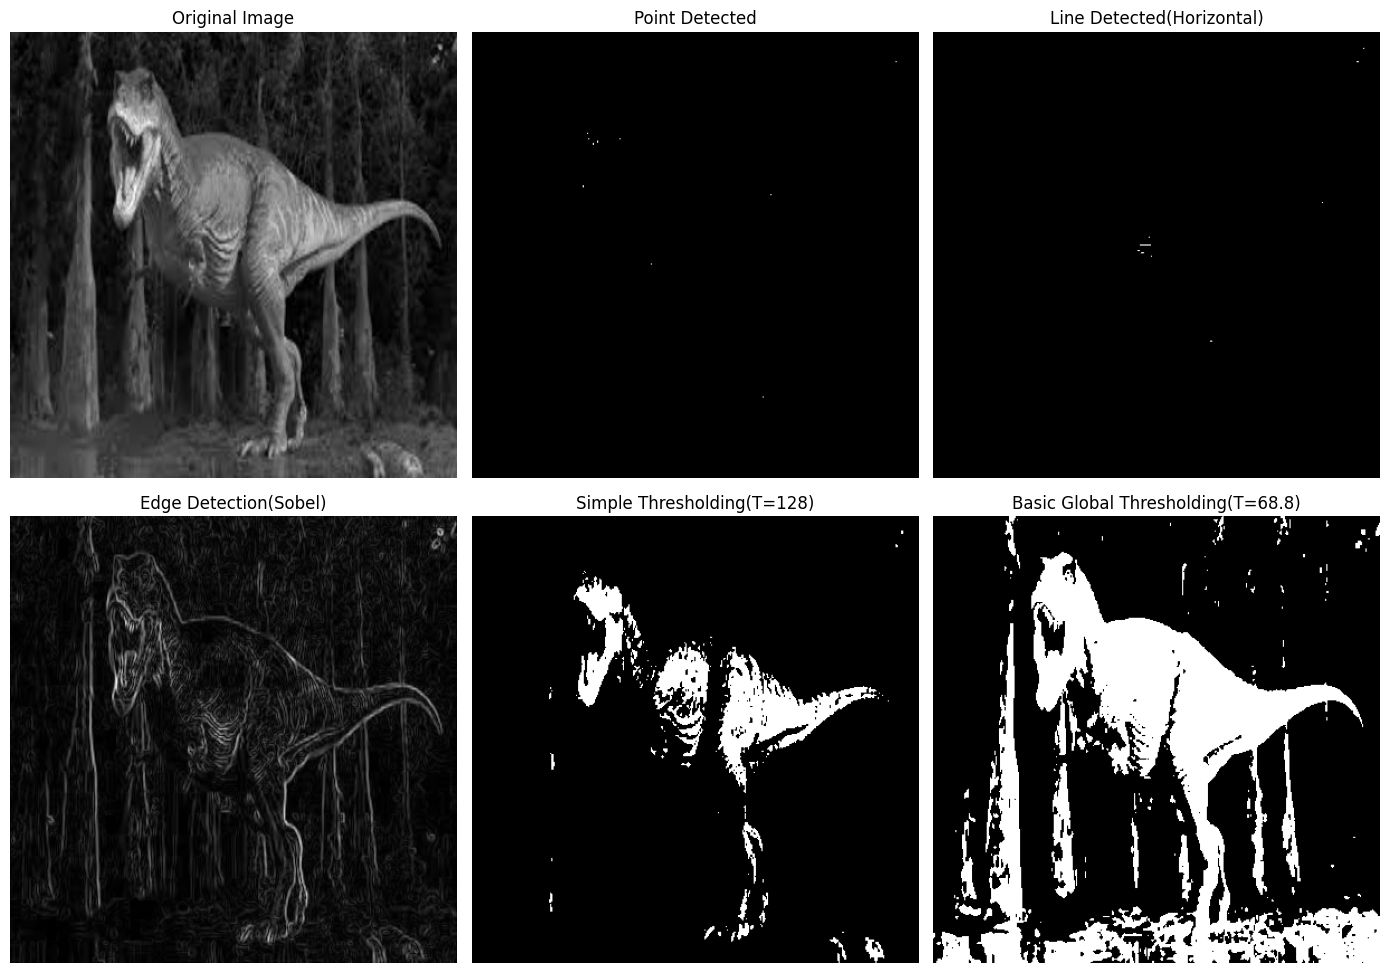

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import clear_output

print("Please upload an image file(JPG<PNG<etc.,)")
uploaded=files.upload()
for fn in uploaded.keys():
  filename=fn
  print(f"Uploaeded file: {filename}")

img=cv2.imread(filename,cv2.IMREAD_GRAYSCALE)
if img is None:
  raise ValueError("Error:Unable to raed the image")

img=cv2.resize(img,(400,400))
point_kernel=np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
point_detected=cv2.filter2D(img,-1,point_kernel)
_,point_detected=cv2.threshold(point_detected,127,255,cv2.THRESH_BINARY)
line_kernel=np.array([[-1,-1,-1],[2,2,2],[-1,-1,-1]])
line_detected=cv2.filter2D(img,-1,line_kernel)
_,line_detected=cv2.threshold(line_detected,127,255,cv2.THRESH_BINARY)
Gx=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
Gy=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
edge_magnitude=np.sqrt(Gx**2+Gy**2)
edge_magnitude=np.uint8((edge_magnitude/edge_magnitude.max())*255)
T=128
_,thresh_simple=cv2.threshold(img,T,255,cv2.THRESH_BINARY)
def basic_global_thresholding(image,delta_T=1):
  T=np.mean(image)
  while True:
    G1=image[image>=T]
    G2=image[image<T]
    m1=np.mean(G1)if len(G1)>0 else 0
    m2=np.mean(G2)if len(G2)>0 else 0
    T_new=(m1+m2)/2
    if abs(T-T_new)<delta_T:
      break
    T=T_new
  _,segmented=cv2.threshold(image,T,255,cv2.THRESH_BINARY)
  return segmented,T
thresh_global,final_T=basic_global_thresholding(img)
print(f"Basic Global Threshold Found:T={final_T:.2f}")
clear_output(wait=True)
plt.figure(figsize=(14,10))
plt.subplot(2,3,1)
plt.imshow(img,cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.subplot(2,3,2)
plt.imshow(point_detected,cmap='gray')
plt.title("Point Detected")
plt.axis('off')
plt.subplot(2,3,3)
plt.imshow(line_detected,cmap='gray')
plt.title("Line Detected(Horizontal)")
plt.axis('off')
plt.subplot(2,3,4)
plt.imshow(edge_magnitude,cmap='gray')
plt.title("Edge Detection(Sobel)")
plt.axis('off')
plt.subplot(2,3,5)
plt.imshow(thresh_simple,cmap='gray')
plt.title("Simple Thresholding(T=128)")
plt.axis('off')
plt.subplot(2,3,6)
plt.imshow(thresh_global,cmap='gray')
plt.title(f"Basic Global Thresholding(T={final_T:.1f})")
plt.axis('off')
plt.tight_layout()
plt.show()

Saving image.jpg to image.jpg


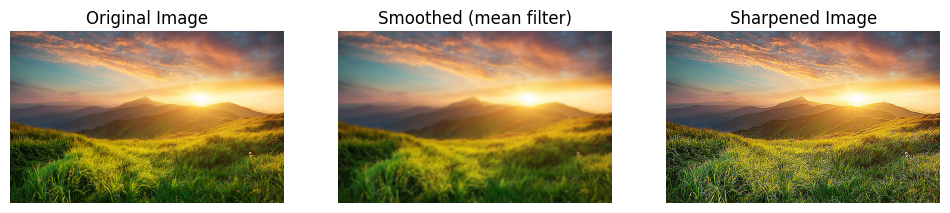

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
uploaded=files.upload()
for filename in uploaded.keys():
  image_path=filename
img=cv2.imread(image_path)
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
kernel=np.ones((5,5),np.float32)/25
smoothed=cv2.filter2D(img_rgb,-1,kernel)
sharpen_kernel=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
sharpened=cv2.filter2D(img_rgb,-1,sharpen_kernel)
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(smoothed)
plt.title("Smoothed (mean filter)")
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(sharpened)
plt.title("Sharpened Image")
plt.axis('off')
plt.show()